In [1]:
import pandas as pd # 引用套件並縮寫為 pd  
df_capterra = pd.read_csv('test.csv', encoding='utf_8_sig', index_col=0) 
df_capterra

,Review,Title,Overall,Pros,Cons,Switch,Switch_reason,Alter,Alter_reason
0,1,"“Most simple, reliable and efficient meeting ...",I would simply say that it has been the softwa...,"The simplicity and usability of the software, ...",Background noise management is not yet so good...,Google Meet and Microsoft Teams,Users will slow internet speeds had very horri...,Google Meet and Microsoft Teams,"Zoom is very simple to use, no need for sign u..."
1,2,“Zoom Meeting's review”,The implementation of this software has allowe...,"To begin, some of the features that are impact...","Talking about the subject, I consider that the...",NaN,NaN,Google Meet,I think that what convinced me the most to pur...
2,3,"“After the pandemic, everyone in the field kno...","It gets the job done, it has many features, an...",The free plan is pretty generous with up to 10...,I don't like the fact that software needs to b...,NaN,NaN,NaN,NaN
3,4,“Click and start!”,I have had a few techno-phobic clients and eve...,Most people have heard of it and been exposed ...,Moderators for big groups could perhaps be a b...,Google Meet,I chose this over google meet for a few reason...,Google Meet and Google Workspace,When using Google Meet I didn't realise it was...
4,5,“Zoom- Clear audio and HD Video Calling Featur...,"Zoom has the best video conferencing, online m...",Zoom is the clear choice for video conferencin...,No problem to use zoom for business meetings. ...,NaN,NaN,Google Hangouts,Zoom has advance feature to do business meetin...
...,...,...,...,...,...,...,...,...,...
995,996,“Great tool for keeping communication lines open”,The biggest problem that we have solved with i...,Zoom was incredibly easy to integrate into our...,The thing that I felt was lacking with Zoom is...,NaN,NaN,Google Meet,It was much easier to use.
996,997,“Best Virtual Conference Software for the Masses”,Overall zoom was really easy to deploy to our ...,Having used plenty of different software offer...,My issue with the zoom has been their security...,NaN,NaN,NaN,NaN
997,998,"“Easy to use, popular platform. Inexpensive.”",I would totally recommend this to small organi...,Ease of use. Anyone can use it and don't need ...,Logo design could be made more fancy.\nSometim...,NaN,NaN,NaN,NaN
998,999,“Zoom in 2020”,My overall experience has been great! Zoom has...,This software has definitely become more popul...,What I like least about Zoom is that it doesn'...,NaN,NaN,NaN,NaN


In [2]:
doc_complete = df_capterra.Cons.values.tolist()
doc_complete[0]

"Background noise management is not yet so good though I assume that this is technically possible to achieve. Sometimes participant unmutes and attempts to speak with very high background noise hence causing unnecessary disrupting and distractions in the meeting. It would be awesome if there is a feature within the software to manage if a users' microphone background noise"

In [3]:
# Convert to list
doc_complete = df_capterra.Cons.values.tolist()
doc_seperate=[]
import re
for review in doc_complete:
    pattern = r'.'
    review = str(review)
    result = review.split('.')
    for i in result:
        doc_seperate.append(i)
doc_seperate[1]

' Sometimes participant unmutes and attempts to speak with very high background noise hence causing unnecessary disrupting and distractions in the meeting'

In [4]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(doc_seperate))
print(data_words[1])

['sometimes', 'participant', 'unmutes', 'and', 'attempts', 'to', 'speak', 'with', 'very', 'high', 'background', 'noise', 'hence', 'causing', 'unnecessary', 'disrupting', 'and', 'distractions', 'in', 'the', 'meeting']


In [5]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['background_noise', 'management', 'is', 'not', 'yet', 'so', 'good', 'though', 'assume', 'that', 'this', 'is', 'technically', 'possible', 'to', 'achieve']


In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['nan', 'subject', 're', 'edu'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [7]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_trigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# !python -m spacy download en

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[8])

['require', 'learn', 'period', 'get', 'use']


In [8]:
from gensim import corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


### LDA 法一

In [9]:
from gensim.models import CoherenceModel
# Build LDA model
import matplotlib.pyplot as plt
topics_num = []
Coherence_Score = []

for i in range(1,21):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    topics_num.append(i)
    Coherence_Score.append(coherence_lda)

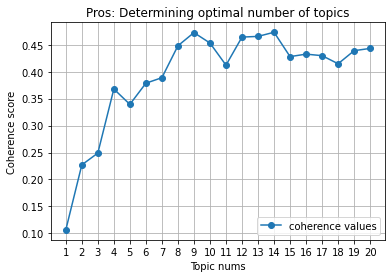

In [10]:
lines = plt.plot(topics_num, Coherence_Score)
plt.setp(lines, marker = "o") 
plt.grid(True)
plt.title("Pros: Determining optimal number of topics") 
plt.xlabel("Topic nums")
plt.ylabel("Coherence score")
plt.legend(["coherence values"], loc='best')
plt.xticks(topics_num)
plt.show()

In [19]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.203*"feature" + 0.066*"take" + 0.060*"security" + 0.056*"find" + '
  '0.039*"hard" + 0.032*"new" + 0.030*"con" + 0.024*"email" + 0.024*"concern" '
  '+ 0.024*"team"'),
 (1,
  '0.142*"many" + 0.135*"account" + 0.095*"little" + 0.059*"first" + '
  '0.057*"log" + 0.037*"business" + 0.035*"dislike" + 0.028*"place" + '
  '0.027*"yet" + 0.027*"complaint"'),
 (2,
  '0.096*"video" + 0.083*"sometimes" + 0.075*"people" + 0.052*"audio" + '
  '0.042*"able" + 0.034*"think" + 0.034*"quality" + 0.034*"computer" + '
  '0.028*"least" + 0.027*"allow"'),
 (3,
  '0.145*"software" + 0.101*"version" + 0.077*"free" + 0.063*"record" + '
  '0.059*"bit" + 0.052*"minute" + 0.047*"seem" + 0.046*"download" + '
  '0.046*"session" + 0.035*"automatically"'),
 (4,
  '0.269*"use" + 0.072*"easy" + 0.050*"set" + 0.041*"limit" + 0.037*"long" + '
  '0.031*"love" + 0.031*"phone" + 0.031*"sharing" + 0.031*"much" + '
  '0.027*"background"'),
 (5,
  '0.151*"screen" + 0.116*"share" + 0.080*"call" + 0.074*"option" + '


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -9.59431653329892

Coherence Score:  0.47324411864401783


In [35]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.424619 -0.137197       1        1  23.087386
2     -0.100984  0.412053       2        1  12.248508
9      0.013419 -0.008484       3        1   8.373427
5      0.005698 -0.002807       4        1   7.684861
0      0.022019 -0.014169       5        1   7.601129
4      0.007144 -0.003918       6        1   7.520154
3      0.009079 -0.005339       7        1   6.656977
8      0.060710 -0.032693       8        1   5.341489
11     0.061376 -0.032846       9        1   4.499346
10     0.069283 -0.035405      10        1   4.416381
13     0.060079 -0.032241      11        1   4.238411
12     0.070269 -0.035338      12        1   3.346930
1      0.069019 -0.035026      13        1   3.172974
6      0.077507 -0.036590      14        1   1.812027, topic_info=            Term        Freq       Total Category  logprob  loglift
14       meeting  575.000000  575.000000  Default  30.0000  30.0000
122         zoom  822.000000  822.000000  Default  29.0000  29.0000
46           use  444.000000  444.000000  Default  28.0000  28.0000
21       feature  338.000000  338.000000  Default  27.0000  27.0000
194       screen  255.000000  255.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1319       fault    0.059359    1.159926  Topic14  -8.8080   1.0382
1764         lie    0.058697    1.147272  Topic14  -8.8192   1.0380
1712  encryption    0.058697    1.148059  Topic14  -8.8192   1.0373
917        route    0.058719    1.154387  Topic14  -8.8188   1.0322
583         stop    0.058376    1.170074  Topic14  -8.8247   1.0128

[460 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
777       8  0.962736   ability
84        2  0.988486      able
129       1  0.983740    access
105      13  0.991018   account
272       2  0.976808  actually
...     ...       ...       ...
144      10  0.899205     worth
113      13  0.754348     wrong
104      14  0.902753      year
306      13  0.953775       yet
122       1  0.999107      zoom

[370 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 10, 6, 1, 5, 4, 9, 12, 11, 14, 13, 2, 7])

In [24]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each review
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=doc_seperate)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Cons_review_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cons_review_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.2365,"screen, share, call, option, see, host, diffic...",Background noise management is not yet so good...
1,1,6.0,0.2743,"participant, platform, unmute, login, improvem...",Sometimes participant unmutes and attempts to...
2,2,7.0,0.2232,"zoom, time, issue, user, need, work, thing, me...",It would be awesome if there is a feature wit...
3,3,10.0,0.2015,"want, wish, however, talk, great, product, com...","Talking about the subject, I consider that the..."
4,4,7.0,0.1879,"zoom, time, issue, user, need, work, thing, me...",It should last at least 50 minutes
5,5,7.0,0.2324,"zoom, time, issue, user, need, work, thing, me...",
6,6,7.0,0.2366,"zoom, time, issue, user, need, work, thing, me...",I don't like the fact that software needs to b...
7,7,13.0,0.2005,"well, go, even, show, improve, different, web,...","It does have a web version, but even then it'..."
8,8,4.0,0.2813,"use, easy, set, limit, long, love, phone, shar...",\nIt requires a learning period to get on how ...
9,9,7.0,0.2008,"zoom, time, issue, user, need, work, thing, me...","If you have a co-host who isn't familiar, it ..."


In [33]:
df_dominant_topic[df_dominant_topic["Dominant_Topic"] == 9.0].sort_values(by=['Topic_Perc_Contrib'], ascending=False)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cons_review_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
61,61,9.0,0.3230,"meeting, join, connection, pay, default, feel,...",There aren't anyt any state-of-the-art capabi...
2833,2833,9.0,0.3151,"meeting, join, connection, pay, default, feel,...",Recurring meeting: It's good if you can put th...
957,957,9.0,0.3102,"meeting, join, connection, pay, default, feel,...",The join a meeting process can actually be a b...
50,50,9.0,0.3066,"meeting, join, connection, pay, default, feel,...",\nAs someone who has to pay attention only to ...
206,206,9.0,0.3066,"meeting, join, connection, pay, default, feel,...","\nWhen i enter a new meeting, i can choose to ..."
...,...,...,...,...,...
2336,2336,9.0,0.1467,"meeting, join, connection, pay, default, feel,...",This reduces the performance of the meeting a...
3523,3523,9.0,0.1467,"meeting, join, connection, pay, default, feel,...",The chat feature in room is a bit clunky and i...
1567,1567,9.0,0.1400,"meeting, join, connection, pay, default, feel,...",I would hope that the default could be that ...
3135,3135,9.0,0.1399,"meeting, join, connection, pay, default, feel,...",- Features are limited as compared to other co...


In [26]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3901,"feature, take, security, find, hard, new, con,...",It is hard to find new features that help in ...
1,1.0,0.2752,"many, account, little, first, log, business, d...",It's extraordinary for some little reason int...
2,2.0,0.4654,"video, sometimes, people, audio, able, think, ...",The video quality is sometimes poor on bad in...
3,3.0,0.3658,"software, version, free, record, bit, minute, ...","In the free version, the session automaticall..."
4,4.0,0.3199,"use, easy, set, limit, long, love, phone, shar...",The idea of sharing screens today is not longe...
5,5.0,0.4477,"screen, share, call, option, see, host, diffic...","Also, the moment when the host starts sharing..."
6,6.0,0.2743,"participant, platform, unmute, login, improvem...",Sometimes participant unmutes and attempts to...
7,7.0,0.5560,"zoom, time, issue, user, need, work, thing, me...","Everything works fine, I did not encounter any..."
8,8.0,0.3818,"also, chat, end, available, case, try, say, de...",\nText-chat could stand to be improved; if yo...
9,9.0,0.3230,"meeting, join, connection, pay, default, feel,...",There aren't anyt any state-of-the-art capabi...


In [27]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_contribution, topic_counts], axis=1)
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Perc_eviews', 'Num_Reviews']
df_dominant_topics.sort_values(by=['Dominant_Topic'])

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Topic_Keywords,Perc_eviews,Num_Reviews
12.0,0.0,"feature, take, security, find, hard, new, con,...",0.0011,4
9.0,1.0,"many, account, little, first, log, business, d...",0.0230,84
11.0,2.0,"video, sometimes, people, audio, able, think, ...",0.0022,8
10.0,3.0,"software, version, free, record, bit, minute, ...",0.0022,8
5.0,4.0,"use, easy, set, limit, long, love, phone, shar...",0.0156,57
0.0,5.0,"screen, share, call, option, see, host, diffic...",0.0197,72
1.0,6.0,"participant, platform, unmute, login, improvem...",0.0011,4
2.0,7.0,"zoom, time, issue, user, need, work, thing, me...",0.0555,203
13.0,8.0,"also, chat, end, available, case, try, say, de...",0.0014,5
8.0,9.0,"meeting, join, connection, pay, default, feel,...",0.0055,20


### LDA 法二

In [129]:
from gensim.models import LdaMulticore
# Build LDA model
import matplotlib.pyplot as plt
topics_num = []
Coherence_Score = []

for i in range(1,21):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=i, 
                                            random_state=100,
                                            chunksize=100,
                                            passes=10,
                                            per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    topics_num.append(i)
    Coherence_Score.append(coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


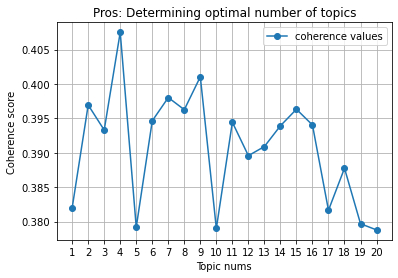

In [34]:
lines = plt.plot(topics_num, Coherence_Score)
plt.setp(lines, marker = "o") 
plt.grid(True)
plt.title("Pros: Determining optimal number of topics") 
plt.xlabel("Topic nums")
plt.ylabel("Coherence score")
plt.legend(["coherence values"], loc='best')
plt.xticks(topics_num)
plt.show()

In [93]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

  0%|                                                                                          | 0/540 [30:25<?, ?it/s]

 24%|██████████████████▍                                                           | 128/540 [30:52<1:40:52, 14.69s/it]


 48%|████████████████████████████████████▌                                       | 260/540 [1:01:52<1:05:27, 14.03s/it]


 73%|████████████████████████████████████████████████████████▌                     | 392/540 [1:33:48<35:07, 14.24s/it]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 524/540 [2:06:20<03:59, 14.98s/it]


100%|██████████████████████████████████████████████████████████████████████████████| 540/540 [2:10:13<00:00, 14.47s/it]


In [35]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.004*"zoom" + 0.004*"host" + 0.003*"easy" + 0.003*"meeting" + '
  '0.003*"group" + 0.003*"feature" + 0.003*"use" + 0.002*"reaction" + '
  '0.002*"allow" + 0.002*"chat"'),
 (1,
  '0.004*"zoom" + 0.003*"easy" + 0.002*"meeting" + 0.001*"video" + 0.001*"use" '
  '+ 0.001*"feature" + 0.001*"work" + 0.001*"software" + 0.001*"user" + '
  '0.001*"great"'),
 (2,
  '0.008*"student" + 0.006*"zoom" + 0.006*"teacher" + 0.004*"class" + '
  '0.004*"software" + 0.003*"face" + 0.003*"teach" + 0.003*"learn" + '
  '0.002*"use" + 0.002*"school"'),
 (3,
  '0.036*"zoom" + 0.034*"meeting" + 0.020*"easy" + 0.017*"feature" + '
  '0.016*"video" + 0.013*"screen" + 0.012*"share" + 0.011*"also" + '
  '0.011*"software" + 0.011*"use"'),
 (4,
  '0.003*"zoom" + 0.003*"easy" + 0.002*"meeting" + 0.001*"video" + '
  '0.001*"feature" + 0.001*"software" + 0.001*"work" + 0.001*"great" + '
  '0.001*"use" + 0.001*"screen"'),
 (5,
  '0.004*"meeting" + 0.003*"zoom" + 0.003*"easy" + 0.002*"keep" + '
  '0.002*"opportunit

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.36378294852872695


In [114]:
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.183433  0.000548       1        1  71.340992
8     -0.008453 -0.013816       2        1   5.298651
2      0.013261  0.016711       3        1   4.206442
0      0.011204  0.002529       4        1   3.436912
5      0.031109 -0.001798       5        1   3.398365
6      0.018849  0.002244       6        1   3.342570
7      0.041380 -0.002129       7        1   3.055659
1      0.035391 -0.001912       8        1   2.963721
4      0.040692 -0.002378       9        1   2.956688, topic_info=         Term        Freq       Total Category  logprob  loglift
43       zoom  905.000000  905.000000  Default  30.0000  30.0000
421   student   63.000000   63.000000  Default  29.0000  29.0000
125      host  101.000000  101.000000  Default  28.0000  28.0000
5        easy  509.000000  509.000000  Default  27.0000  27.0000
33   software  277.000000  277.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
99       time    0.705888  181.507761   Topic9  -7.2359  -2.0285
57        get    0.659232  104.938645   Topic9  -7.3043  -1.5490
411      need    0.674715  137.151131   Topic9  -7.2811  -1.7934
186      even    0.660484  147.856703   Topic9  -7.3024  -1.8899
2        chat    0.659307  176.704901   Topic9  -7.3042  -2.0699

[597 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
233       1  0.945155  able
233       2  0.008833  able
233       3  0.008833  able
233       4  0.008833  able
233       5  0.008833  able
...     ...       ...   ...
43        5  0.004415  zoom
43        6  0.007727  zoom
43        7  0.003311  zoom
43        8  0.004415  zoom
43        9  0.003311  zoom

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 3, 1, 6, 7, 8, 2, 5])